In [ ]:
''' 
      @author : BALAVIGNESH M

      Code Scope:
        To apply the EDA on titanic Dataset
'''


# Import Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
sns.set()
%matplotlib inline


In [ ]:
dataFrame = pd.read_csv('titanic.csv')
dataFrame.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# EDA

# To Analysis of Missing Data in the Dataset

dataFrame.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


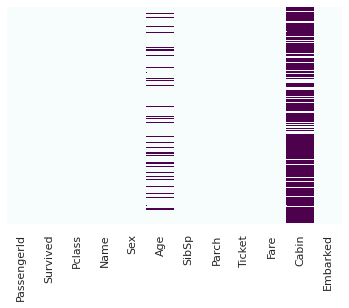

In [ ]:
# To use the seaborn to visualize the where the missing data are present

sns.heatmap(data=dataFrame.isnull(), cmap='BuPu', yticklabels=False, cbar=False)

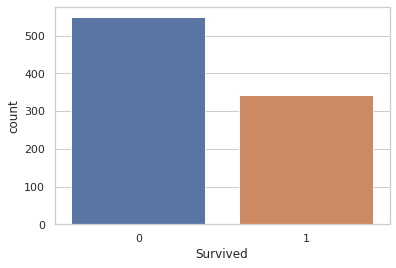

In [ ]:
# To analyze the Survived column
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=dataFrame)

So here servived more than 300 and not survived 550 above

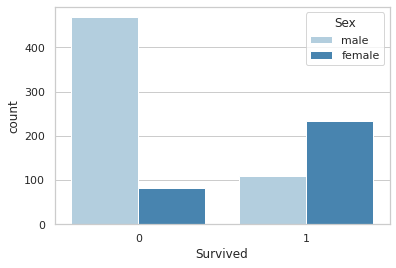

In [ ]:
# To Analyze which category peoples are Survived

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=dataFrame, palette='Blues')

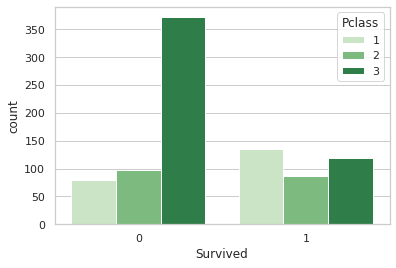

In [ ]:
# To analyze which Passanger class are Survived ratio

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', palette='Greens', data=dataFrame)

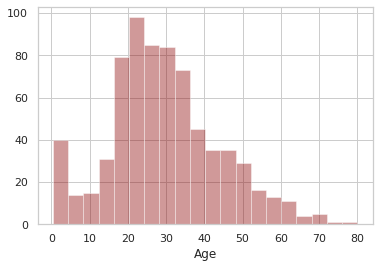

In [ ]:
# To Analyze Which Age group are present in the Ship

sns.distplot(dataFrame['Age'].dropna(), bins=20, kde=False, hist=True, color='darkred')

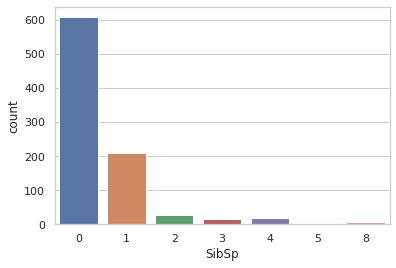

In [ ]:
# To Analyze the Siblings and Spouse

sns.countplot(x='SibSp', data=dataFrame)

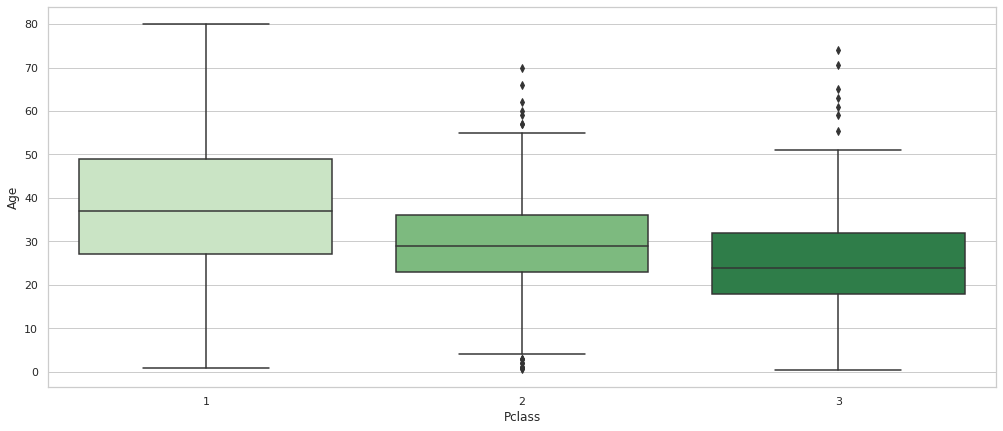

In [ ]:
# Data Cleaning

plt.figure(figsize=(17,7))
sns.boxplot(data=dataFrame, x='Pclass', y='Age', palette='Greens')

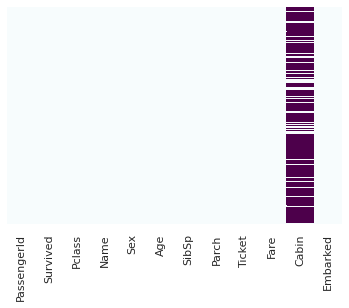

In [ ]:
def resolve_missing_age(age):
  age,pclass = age[0],age[1]

  age_avr = [37,29,24]
  if pd.isnull(age):
    return age_avr[int(pclass) - 1]
  else:
    return age


dataFrame['Age'] = dataFrame[['Age', 'Pclass']].apply(resolve_missing_age, axis=1)
sns.heatmap(data=dataFrame.isnull(), cmap='BuPu', yticklabels=False, cbar=False)

In [ ]:
dataFrame.drop('Cabin', axis=1, inplace=True)

In [ ]:
dataFrame.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Convert the Categorical to Features

dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
pd.get_dummies(dataFrame['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [ ]:
sex = pd.get_dummies(dataFrame['Sex'])
embark = pd.get_dummies(dataFrame['Embarked'])

In [ ]:
dataFrame.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
dataFrame.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
newDataFrame = pd.concat([dataFrame, sex, embark], axis=1)
newDataFrame.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1
